In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

# if you have recent matplotlib versions it spamms deprecation warnings
# these two lines remove the problem
import warnings
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
#!pip list

In [2]:
data_1 = pd.read_csv('data/01.csv', sep=',')
data_2 = pd.read_csv('data/02.csv', sep=',')
data_3 = pd.read_csv('data/03.csv', sep=',')
data_4 = pd.read_csv('data/04.csv', sep=',')
data_5 = pd.read_csv('data/05.csv', sep=',')
data_6 = pd.read_csv('data/06.csv', sep=',')
data_7 = pd.read_csv('data/07.csv', sep=',')
data_8 = pd.read_csv('data/08.csv', sep=',')
data_9 = pd.read_csv('data/09.csv', sep=',')
data_10 = pd.read_csv('data/10.csv', sep=',')
data_11 = pd.read_csv('data/11.csv', sep=',')
data_12 = pd.read_csv('data/12.csv', sep=',')
data_13 = pd.read_csv('data/13.csv', sep=',')
data_14 = pd.read_csv('data/14.csv', sep=',')
data_15 = pd.read_csv('data/15.csv', sep=',')
data_16 = pd.read_csv('data/16.csv', sep=',')
data_17 = pd.read_csv('data/17.csv', sep=',')
data_18 = pd.read_csv('data/18.csv', sep=',')
data_19 = pd.read_csv('data/19.csv', sep=',')
data_20 = pd.read_csv('data/20.csv', sep=',')

data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()

list_data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20]

In [3]:
a_peak = []
x_prime_peak = []

for i in range(1,8):
    # Specify the path to your text file
    file_path_a = "peaks/a_peak_{}.txt".format(i)
    # Specify the path to your text file
    file_path_x_prime = "peaks/x_prime_peak_{}.txt".format(i)

    # Read the contents of the file as a string
    with open(file_path_a, 'r') as file_a:
        a_content = file_a.read()
        
    # Read the contents of the file as a string
    with open(file_path_x_prime, 'r') as file_x_prime:
        x_prime_content = file_x_prime.read()

    # Remove the square brackets and split the string into individual elements
    a_elements = a_content.strip('[]').split(', ')
    x_prime_elements = x_prime_content.strip('[]').split(', ')

    # Convert the elements to integers
    a_peak.append(np.array(a_elements, dtype=int))
    x_prime_peak.append(np.array(x_prime_elements, dtype=int))

In [4]:
for i in range(7):
    p = list(map(int,a_peak[i]))
    d = list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    a_peak[i] = t

peak_a_1 = a_peak[0]
peak_a_2 = a_peak[1]
peak_a_3 = a_peak[2]
peak_a_4 = a_peak[3]
peak_a_5 = a_peak[4]
peak_a_6 = a_peak[5]
peak_a_7 = a_peak[6]

peak_a = np.concatenate((peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7), axis = None)
datatrain = np.concatenate((data_1,data_2,data_3,data_4,data_5,data_6,data_7), axis = 0)
datatest = np.concatenate((data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20), axis = 0)

# Peak detection with NN
### We tried to build a NN able to detect as many peak as possibile of the typical 6 peaks present in a pletysmography complete cycle. The algorithm was based on supervised learning, with labeled data by hand.

In [5]:
data = np.column_stack(( datatrain, peak_a ))

sequence_length = 15

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length, [1]])
    y.append(data[i:i+sequence_length, 4])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.89)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')


Training shape: (22140, 15, 1)
Testing shape: (2737, 15, 1)


In [6]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

input_shape = (X_train.shape[1], X_train.shape[2])

print(input_shape)

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D(sequence_length, 5 , activation='relu',input_shape=input_shape[1:])(input_data)

pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( int(sequence_length/2 ) , 2, activation='relu',input_shape=input_shape[1:])(pool1)

pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv2)

flat = keras.layers.Flatten()(pool2)

fc0 = keras.layers.Dense(128, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

drop2 = keras.layers.Dropout(0.2)

output = keras.layers.Dense(sequence_length, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output')(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output])

model.summary()

Training shape: (22140, 15, 1)
Testing shape: (2737, 15, 1)
(15, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 15, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 11, 15)            90        
                                                                 
 pool1 (MaxPooling1D)        (None, 5, 15)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 7)              217       
                                                                 
 pool2 (MaxPooling1D)        (None, 2, 7)              0         
                                                                 
 flatten (Flatten)           (None, 14)                0         
                                                           

In [7]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms = keras.optimizers.RMSprop(learning_rate=0.001 )

model.compile(optimizer=rms,
              loss='binary_crossentropy',
              metrics=['accuracy','FalseNegatives'] )

history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 32)

Epoch 1/100
554/554 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.2261 - false_negatives: 4243.0000 - val_loss: 0.0620 - val_accuracy: 0.4688 - val_false_negatives: 1008.0000
Epoch 2/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0609 - accuracy: 0.2628 - false_negatives: 4257.0000 - val_loss: 0.0562 - val_accuracy: 0.4101 - val_false_negatives: 1008.0000
Epoch 3/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0564 - accuracy: 0.3812 - false_negatives: 4257.0000 - val_loss: 0.0533 - val_accuracy: 0.3458 - val_false_negatives: 1008.0000
Epoch 4/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0538 - accuracy: 0.3709 - false_negatives: 4257.0000 - val_loss: 0.0508 - val_accuracy: 0.4311 - val_false_negatives: 1008.0000
Epoch 5/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0520 - accuracy: 0.3861 - false_negatives: 4257.0000 - val_loss: 0.0496 - val_accuracy: 0.3932 - val_fa

In [8]:
pred_y = model.predict(X_test) > 0.3
print(len(pred_y))

86/86 [==============================] - 0s 651us/step
2737


In [9]:
for i in range(len(pred_y)-sequence_length+1):
        if i==0:
                pred_y_plot = np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )))      

df = pd.DataFrame(pred_y_plot,  columns=['pred','ind'])
df = df.groupby('ind').sum('pred')        
df['pred'] = df['pred']/sequence_length 

In [10]:
for i in range(len(X_test)-sequence_length+1):
        if i==0:
                xtest_y_plot = np.column_stack( (X_test[i,:,0] , np.arange(i,i+sequence_length,1), y_test[i]) )
        else:
                xtest_y_plot = np.row_stack( (xtest_y_plot, np.column_stack( (X_test[i,:,0], np.arange(i,i+sequence_length,1), y_test[i]) )))      

df_x = pd.DataFrame(xtest_y_plot,  columns=['x_test','ind', 'y_test'])
df_x = df_x.groupby('ind')[['x_test', 'y_test']].mean()

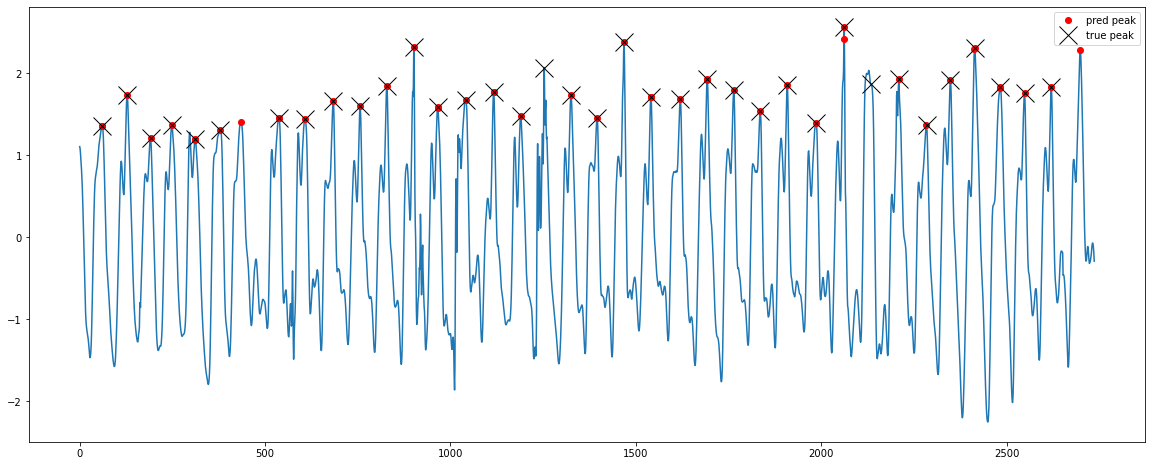

In [11]:
threshold = 0.5

fig = plt.figure(figsize=(20,8))
plt.plot(df_x['x_test'])
plt.plot(np.where(df['pred']>threshold)[0],  df_x['x_test'][df['pred']>threshold], 'o', color = 'red' , label = 'pred peak')
plt.plot(np.where(df_x['y_test']==1)[0],  df_x['x_test'][df_x['y_test']==1], 'x', color = 'black', markersize=18 , label = 'true peak')
plt.legend()

In [12]:
lab_pos = np.where(df_x['y_test']==1)[0]
pred_pos = np.where(df['pred']>threshold)[0]
print(lab_pos)
print(pred_pos)
true_posi = len(np.intersect1d(lab_pos, pred_pos))

for z in lab_pos:
    if z not in pred_pos:
        if z+1 in pred_pos or z-1 in pred_pos:
            true_posi += 1


print("The 1-1 score is", round(true_posi/len(lab_pos),4))

[  61  128  191  249  312  379  538  607  684  756  828  901  966 1041
 1116 1189 1253 1325 1396 1468 1540 1620 1692 1764 1835 1908 1986 2062
 2134 2209 2284 2348 2414 2483 2548 2620]
[  60   61  128  191  248  311  312  379  434  537  538  607  684  756
  828  901  965  966 1041 1116 1117 1189 1325 1395 1468 1540 1541 1620
 1692 1693 1764 1835 1908 1986 2061 2062 2209 2283 2348 2413 2414 2482
 2483 2548 2620 2698]
The 1-1 score is 0.9444


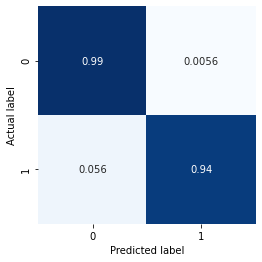

In [13]:
import seaborn as sns

normalize = True

mat = np.array(confusion_matrix(df_x['y_test'], df['pred']>threshold), dtype=float)
if normalize:
    mat[0,0] = mat[0,0]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,1] = true_posi/len(lab_pos)

    mat[0,1] = mat[0,1]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,0] = 1-true_posi/len(lab_pos)

labels = ['0', '1']
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## X Prime

In [14]:
for i in range(7):
    p = list(map(int,x_prime_peak[i]))
    d = list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    x_prime_peak[i] = t

peak_x_1 = x_prime_peak[0]
peak_x_2 = x_prime_peak[1]
peak_x_3 = x_prime_peak[2]
peak_x_4 = x_prime_peak[3]
peak_x_5 = x_prime_peak[4]
peak_x_6 = x_prime_peak[5]
peak_x_7 = x_prime_peak[6]

peak_x = np.concatenate((peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7), axis = None)
datatrain = np.concatenate((data_1,data_2,data_3,data_4,data_5,data_6,data_7), axis = 0)
datatest = np.concatenate((data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20), axis = 0)

In [15]:
data = np.column_stack((datatrain, peak_x))

sequence_length = 15

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length, [1]])
    y.append(data[i:i+sequence_length, 4])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.89)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')


Training shape: (22140, 15, 1)
Testing shape: (2737, 15, 1)


In [16]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

input_shape = (X_train.shape[1], X_train.shape[2])

print(input_shape)

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D(sequence_length, 5 , activation='relu',input_shape=input_shape[1:])(input_data)

pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( int(sequence_length/2 ) , 2, activation='relu',input_shape=input_shape[1:])(pool1)

pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv2)

flat = keras.layers.Flatten()(pool2)

fc0 = keras.layers.Dense(128, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

drop2 = keras.layers.Dropout(0.2)

output = keras.layers.Dense(sequence_length, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output')(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output])

model.summary()

Training shape: (22140, 15, 1)
Testing shape: (2737, 15, 1)
(15, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 15, 1)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 15)            90        
                                                                 
 pool1 (MaxPooling1D)        (None, 5, 15)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 7)              217       
                                                                 
 pool2 (MaxPooling1D)        (None, 2, 7)              0         
                                                                 
 flatten_1 (Flatten)         (None, 14)                0         
                                                         

In [17]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms = keras.optimizers.RMSprop(learning_rate=0.001 )

model.compile(optimizer=rms,
              loss='binary_crossentropy',
              metrics=['accuracy','FalseNegatives'] )

history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 32)

Epoch 1/100
554/554 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.2114 - false_negatives: 4423.0000 - val_loss: 0.0644 - val_accuracy: 0.3171 - val_false_negatives: 1098.0000
Epoch 2/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0604 - accuracy: 0.3157 - false_negatives: 4437.0000 - val_loss: 0.0577 - val_accuracy: 0.3498 - val_false_negatives: 1098.0000
Epoch 3/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0558 - accuracy: 0.3231 - false_negatives: 4437.0000 - val_loss: 0.0540 - val_accuracy: 0.2916 - val_false_negatives: 1098.0000
Epoch 4/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0525 - accuracy: 0.3178 - false_negatives: 4434.0000 - val_loss: 0.0513 - val_accuracy: 0.3360 - val_false_negatives: 1098.0000
Epoch 5/100
554/554 [==============================] - 1s 1ms/step - loss: 0.0503 - accuracy: 0.3279 - false_negatives: 4397.0000 - val_loss: 0.0502 - val_accuracy: 0.2943 - val_fa

In [18]:
pred_y = model.predict(X_test) > 0.3
print(len(pred_y))

86/86 [==============================] - 0s 708us/step
2737


In [19]:
for i in range(len(pred_y)-sequence_length+1):
        if i==0:
                pred_y_plot = np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )))      

df = pd.DataFrame(pred_y_plot,  columns=['pred','ind'])
df = df.groupby('ind').sum('pred')        
df['pred'] = df['pred']/sequence_length 

In [20]:
for i in range(len(X_test)-sequence_length+1):
        if i==0:
                xtest_y_plot = np.column_stack( (X_test[i,:,0] , np.arange(i,i+sequence_length,1), y_test[i]) )
        else:
                xtest_y_plot = np.row_stack( (xtest_y_plot, np.column_stack( (X_test[i,:,0], np.arange(i,i+sequence_length,1), y_test[i]) )))      

df_x = pd.DataFrame(xtest_y_plot,  columns=['x_test','ind', 'y_test'])
df_x = df_x.groupby('ind')[['x_test', 'y_test']].mean()

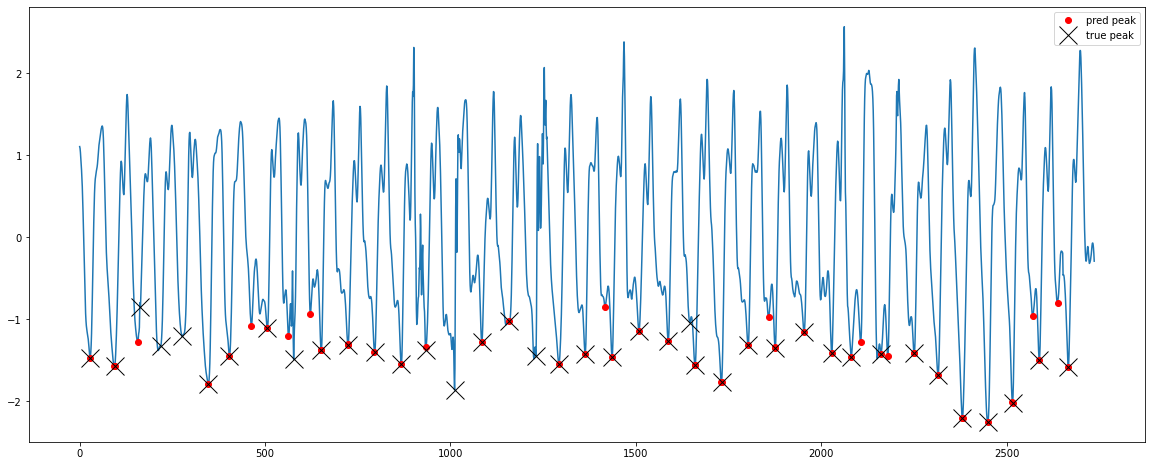

In [21]:
threshold = 0.5

fig = plt.figure(figsize=(20,8))
plt.plot(df_x['x_test'])
plt.plot(np.where(df['pred']>threshold)[0],  df_x['x_test'][df['pred']>threshold], 'o', color = 'red' , label = 'pred peak')
plt.plot(np.where(df_x['y_test']==1)[0],  df_x['x_test'][df_x['y_test']==1], 'x', color = 'black', markersize=18 , label = 'true peak')
plt.legend()

In [22]:
lab_pos = np.where(df_x['y_test']==1)[0]
pred_pos = np.where(df['pred']>threshold)[0]
print(lab_pos)
print(pred_pos)
true_posi = len(np.intersect1d(lab_pos, pred_pos))

for z in lab_pos:
    if z not in pred_pos:
        if z+1 in pred_pos or z-1 in pred_pos:
            true_posi += 1


print("The 1-1 score is", round(true_posi/len(lab_pos),4))

[  28   94  164  218  276  347  404  506  577  651  724  796  867  933
 1011 1084 1159 1230 1292 1363 1436 1508 1587 1646 1660 1731 1803 1876
 1953 2028 2081 2161 2250 2315 2380 2449 2516 2588 2666]
[  28   93   94  156  347  404  463  506  563  622  651  652  723  724
  795  867  934 1084 1159 1292 1363 1417 1436 1508 1587 1659 1660 1730
 1731 1802 1858 1875 1876 1953 2028 2081 2106 2161 2179 2250 2251 2315
 2380 2381 2449 2515 2516 2570 2588 2637 2666]
The 1-1 score is 0.8205


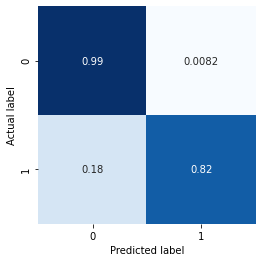

In [23]:
import seaborn as sns

normalize = True

mat = np.array(confusion_matrix(df_x['y_test'], df['pred']>threshold), dtype=float)
if normalize:
    mat[0,0] = mat[0,0]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,1] = true_posi/len(lab_pos)

    mat[0,1] = mat[0,1]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,0] = 1-true_posi/len(lab_pos)

labels = ['0', '1']
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()